In [1]:
import os, sys
from pathlib import Path

BASE_DIR = Path(Path.home(), "workspace", "services", "credit_model")
DATA_DIR = Path(Path.home(), "workspace", "data")
if BASE_DIR not in sys.path:
    sys.path.insert(0, f"{BASE_DIR}")

In [2]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toad

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from util import woe_helper
from util import woe_mono
from util import report_helper

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 加载数据集

In [6]:
fp_data = Path(DATA_DIR, 'tutorial', 'data.csv')
df_data = pd.read_csv(fp_data, index_col=None)

In [7]:
num_cols = ['Collateral_valuation', 'Age', 'Properties_Total', 'Amount', 'Term', 'Historic_Loans', 'Current_Loans', 'Max_Arrears']
cat_cols = ['Region', 'Area', 'Activity', 'Guarantor', 'Collateral', 'Properties_Status']
features = num_cols + cat_cols
label = 'Defaulter'

In [8]:
for c in cat_cols:
    df_data.loc[:, c] = df_data.loc[:, c].apply(lambda x: str(f"cat_{x}"))

# WOE编码

* 决策树分箱

In [9]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='dt')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 43.39it/s]


finish combiner fit
finish combiner transform


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 57.44it/s]

finish WOE fit


In [10]:
pprint(woe.combiner.export(), compact=True)

{'Activity': [['cat_17.0', 'cat_14.0', 'cat_10.0'], ['cat_18.0', 'cat_nan'],
              ['cat_1.0', 'cat_15.0'],
              ['cat_19.0', 'cat_3.0', 'cat_16.0', 'cat_5.0', 'cat_12.0'],
              ['cat_9.0', 'cat_8.0', 'cat_4.0', 'cat_2.0', 'cat_6.0', 'cat_7.0',
               'cat_11.0']],
 'Age': [27.5, 34.5, 41.5, 47.5],
 'Amount': [3481.5, 7483.0, 9868.5, 16920.0],
 'Area': [['cat_90', 'cat_75', 'cat_65', 'cat_45', 'cat_55', 'cat_95',
           'cat_57'],
          ['cat_80', 'cat_85', 'cat_25'],
          ['cat_70', 'cat_5', 'cat_30', 'cat_40', 'cat_87'],
          ['cat_20', 'cat_60', 'cat_50', 'cat_15'], ['cat_10', 'cat_35']],
 'Collateral': [['cat_1'], ['cat_0']],
 'Collateral_valuation': [2057.0, 4571.0, 8324.5, 13823.5, nan],
 'Current_Loans': [1.5, 2.5, nan],
 'Guarantor': [['cat_1', 'cat_0']],
 'Historic_Loans': [1.5, 2.5, 3.5, 8.5],
 'Max_Arrears': [0.5, 37.5, 133.5],
 'Properties_Status': [['cat_B'], ['cat_D'], ['cat_A', 'cat_C']],
 'Properties_Total': [1.5, 2.5]

In [11]:
pprint(woe.woe_encoder.export(), compact=True)

{'Activity': {'00.cat_17.0,cat_14...': -0.8129836351829568,
              '01.cat_18.0,cat_nan': -0.13008891743452072,
              '02.cat_1.0,cat_15.0': 0.002896482207561219,
              '03.cat_19.0,cat_3.0..': 0.5055059063947105,
              '04.cat_9.0,cat_8.0,..': 1.0003920052142827},
 'Age': {'00.[-inf ~ 27.5)': 0.5360301075019426,
         '01.[27.5 ~ 34.5)': 0.29425294929505913,
         '02.[34.5 ~ 41.5)': 0.03061985151045089,
         '03.[41.5 ~ 47.5)': -0.20278872329788467,
         '04.[47.5 ~ inf)': -0.37676921635470967},
 'Amount': {'00.[-inf ~ 3481.5)': -0.5219436333558987,
            '01.[3481.5 ~ 7483.0)': -0.1662607632426821,
            '02.[7483.0 ~ 9868.5)': 0.10329032687215677,
            '03.[9868.5 ~ 16920.0)': 0.420052771730602,
            '04.[16920.0 ~ inf)': 0.7496377503309519},
 'Area': {'00.cat_90,cat_75,ca..': -0.6795022831530181,
          '01.cat_80,cat_85,ca..': -0.1174547703386852,
          '02.cat_70,cat_5,cat..': -0.039813023252234,
     

* 等距分箱

In [12]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='step')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 68.54it/s]


finish combiner fit
finish combiner transform


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 49.15it/s]

finish WOE fit


In [13]:
pprint(woe.combiner.export(), compact=True)

{'Activity': [['cat_17.0', 'cat_14.0', 'cat_10.0', 'cat_18.0'],
              ['cat_nan', 'cat_1.0', 'cat_15.0', 'cat_19.0'],
              ['cat_3.0', 'cat_16.0', 'cat_5.0'],
              ['cat_12.0', 'cat_9.0', 'cat_8.0', 'cat_4.0'],
              ['cat_2.0', 'cat_6.0', 'cat_7.0', 'cat_11.0']],
 'Age': [30.4, 42.8, 55.199999999999996, 67.6],
 'Amount': [27859.6, 54582.2, 81304.79999999999, 108027.4],
 'Area': [['cat_90', 'cat_75', 'cat_65', 'cat_45'],
          ['cat_55', 'cat_95', 'cat_57', 'cat_80'],
          ['cat_85', 'cat_25', 'cat_70', 'cat_5'],
          ['cat_30', 'cat_40', 'cat_87', 'cat_20'],
          ['cat_60', 'cat_50', 'cat_15', 'cat_10', 'cat_35']],
 'Collateral': [['cat_1'], [], [], [], ['cat_0']],
 'Collateral_valuation': [27531.6, 55053.2, 82574.79999999999, 110096.4, nan],
 'Current_Loans': [3.2, 5.4, 7.6000000000000005, 9.8, nan],
 'Guarantor': [['cat_1'], [], [], [], ['cat_0']],
 'Historic_Loans': [8.4, 15.8, 23.200000000000003, 30.6],
 'Max_Arrears': [696.6, 1

In [14]:
pprint(woe.woe_encoder.export(), compact=True)

{'Activity': {'00.cat_17.0,cat_14...': -0.6870459648472289,
              '01.cat_nan,cat_1.0,..': 0.0984249223225517,
              '02.cat_3.0,cat_16.0..': 0.5184248676321269,
              '03.cat_12.0,cat_9.0..': 0.8704007092984497,
              '04.cat_2.0,cat_6.0,..': 1.112348915162334},
 'Age': {'00.[-inf ~ 30.4)': 0.4424758713969199,
         '01.[30.4 ~ 42.8)': 0.09632362801628765,
         '02.[42.8 ~ 55.199999999999996)': -0.30734713120781953,
         '03.[55.199999999999996 ~ 67.6)': -0.330237014514601,
         '04.[67.6 ~ inf)': 0.8438984769962602},
 'Amount': {'00.[-inf ~ 27859.6)': -0.045174334096137546,
            '01.[27859.6 ~ 54582.2)': 0.9035294426953699,
            '02.[54582.2 ~ 81304.79999999999)': 0.47810980589780927,
            '03.[81304.79999999999 ~ 108027.4)': 0.7786952831854982,
            '04.[108027.4 ~ inf)': 0.23969878245281107},
 'Area': {'00.cat_90,cat_75,ca..': -0.7543054926623624,
          '01.cat_55,cat_95,ca..': -0.4950154566131787,
     

* 等频分箱

In [15]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='step')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 68.62it/s]


finish combiner fit
finish combiner transform


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 47.87it/s]

finish WOE fit


In [16]:
pprint(woe.combiner.export(), compact=True)

{'Activity': [['cat_17.0', 'cat_14.0', 'cat_10.0', 'cat_18.0'],
              ['cat_nan', 'cat_1.0', 'cat_15.0', 'cat_19.0'],
              ['cat_3.0', 'cat_16.0', 'cat_5.0'],
              ['cat_12.0', 'cat_9.0', 'cat_8.0', 'cat_4.0'],
              ['cat_2.0', 'cat_6.0', 'cat_7.0', 'cat_11.0']],
 'Age': [30.4, 42.8, 55.199999999999996, 67.6],
 'Amount': [27859.6, 54582.2, 81304.79999999999, 108027.4],
 'Area': [['cat_90', 'cat_75', 'cat_65', 'cat_45'],
          ['cat_55', 'cat_95', 'cat_57', 'cat_80'],
          ['cat_85', 'cat_25', 'cat_70', 'cat_5'],
          ['cat_30', 'cat_40', 'cat_87', 'cat_20'],
          ['cat_60', 'cat_50', 'cat_15', 'cat_10', 'cat_35']],
 'Collateral': [['cat_1'], [], [], [], ['cat_0']],
 'Collateral_valuation': [27531.6, 55053.2, 82574.79999999999, 110096.4, nan],
 'Current_Loans': [3.2, 5.4, 7.6000000000000005, 9.8, nan],
 'Guarantor': [['cat_1'], [], [], [], ['cat_0']],
 'Historic_Loans': [8.4, 15.8, 23.200000000000003, 30.6],
 'Max_Arrears': [696.6, 1

In [17]:
pprint(woe.woe_encoder.export(), compact=True)

{'Activity': {'00.cat_17.0,cat_14...': -0.6870459648472289,
              '01.cat_nan,cat_1.0,..': 0.0984249223225517,
              '02.cat_3.0,cat_16.0..': 0.5184248676321269,
              '03.cat_12.0,cat_9.0..': 0.8704007092984497,
              '04.cat_2.0,cat_6.0,..': 1.112348915162334},
 'Age': {'00.[-inf ~ 30.4)': 0.4424758713969199,
         '01.[30.4 ~ 42.8)': 0.09632362801628765,
         '02.[42.8 ~ 55.199999999999996)': -0.30734713120781953,
         '03.[55.199999999999996 ~ 67.6)': -0.330237014514601,
         '04.[67.6 ~ inf)': 0.8438984769962602},
 'Amount': {'00.[-inf ~ 27859.6)': -0.045174334096137546,
            '01.[27859.6 ~ 54582.2)': 0.9035294426953699,
            '02.[54582.2 ~ 81304.79999999999)': 0.47810980589780927,
            '03.[81304.79999999999 ~ 108027.4)': 0.7786952831854982,
            '04.[108027.4 ~ inf)': 0.23969878245281107},
 'Area': {'00.cat_90,cat_75,ca..': -0.7543054926623624,
          '01.cat_55,cat_95,ca..': -0.4950154566131787,
     

# 手动更新分箱

In [18]:
rule = {
    'Age': [20, 30, 40, 50], 
    'Amount': [25000, 50000, 80000, 100000]
}
woe.update_rule(rule, df_data, label, exclude=['AppNo', label])

finish update rule
finish combiner transform


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 38.45it/s]

finish WOE refit


In [19]:
pprint(woe.combiner.export(), compact=True)

{'Activity': [['cat_17.0', 'cat_14.0', 'cat_10.0', 'cat_18.0'],
              ['cat_nan', 'cat_1.0', 'cat_15.0', 'cat_19.0'],
              ['cat_3.0', 'cat_16.0', 'cat_5.0'],
              ['cat_12.0', 'cat_9.0', 'cat_8.0', 'cat_4.0'],
              ['cat_2.0', 'cat_6.0', 'cat_7.0', 'cat_11.0']],
 'Age': [20, 30, 40, 50],
 'Amount': [25000, 50000, 80000, 100000],
 'Area': [['cat_90', 'cat_75', 'cat_65', 'cat_45'],
          ['cat_55', 'cat_95', 'cat_57', 'cat_80'],
          ['cat_85', 'cat_25', 'cat_70', 'cat_5'],
          ['cat_30', 'cat_40', 'cat_87', 'cat_20'],
          ['cat_60', 'cat_50', 'cat_15', 'cat_10', 'cat_35']],
 'Collateral': [['cat_1'], [], [], [], ['cat_0']],
 'Collateral_valuation': [27531.6, 55053.2, 82574.79999999999, 110096.4, nan],
 'Current_Loans': [3.2, 5.4, 7.6000000000000005, 9.8, nan],
 'Guarantor': [['cat_1'], [], [], [], ['cat_0']],
 'Historic_Loans': [8.4, 15.8, 23.200000000000003, 30.6],
 'Max_Arrears': [696.6, 1393.2, 2089.8, 2786.4],
 'Properties_Sta

In [20]:
pprint(woe.woe_encoder.export(), compact=True)

{'Activity': {'00.cat_17.0,cat_14...': -0.6870459648472289,
              '01.cat_nan,cat_1.0,..': 0.0984249223225517,
              '02.cat_3.0,cat_16.0..': 0.5184248676321269,
              '03.cat_12.0,cat_9.0..': 0.8704007092984497,
              '04.cat_2.0,cat_6.0,..': 1.112348915162334},
 'Age': {'00.[-inf ~ 20)': 1.0319368656569874,
         '01.[20 ~ 30)': 0.4526441002103075,
         '02.[30 ~ 40)': 0.16379411587243822,
         '03.[40 ~ 50)': -0.17772062032415029,
         '04.[50 ~ inf)': -0.3875641111219295},
 'Amount': {'00.[-inf ~ 25000)': -0.07076435975391539,
            '01.[25000 ~ 50000)': 0.9239795338071148,
            '02.[50000 ~ 80000)': 0.6162492426414344,
            '03.[80000 ~ 100000)': 0.6451638905609753,
            '04.[100000 ~ inf)': 0.5273808549045919},
 'Area': {'00.cat_90,cat_75,ca..': -0.7543054926623624,
          '01.cat_55,cat_95,ca..': -0.4950154566131787,
          '02.cat_85,cat_25,ca..': -0.07642348384628884,
          '03.cat_30,cat_40,ca

In [21]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='step')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 71.46it/s]


finish combiner fit
finish combiner transform


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 48.99it/s]


finish WOE fit


# 单调分箱

In [22]:
won = woe_mono.WOEMono()
won.fit(df_data[features], df_data[label], categorical_features=cat_cols, missing_values=[18])

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

add edge case: None in Age


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:20<00:07,  1.44s/it]

add edge case: None in Historic_Loans


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:20<00:01,  1.36it/s]

add edge case: None in Max_Arrears
add edge case: None in Term


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:20<00:00,  1.50s/it]


In [23]:
pprint(won.export(), compact=True)

{'Activity': {'data': ['cat_1.0', 'cat_10.0', 'cat_11.0', 'cat_12.0',
                       'cat_14.0', 'cat_15.0', 'cat_16.0', 'cat_17.0',
                       'cat_18.0', 'cat_19.0', 'cat_2.0', 'cat_3.0', 'cat_4.0',
                       'cat_5.0', 'cat_6.0', 'cat_7.0', 'cat_8.0', 'cat_9.0',
                       'cat_nan'],
              'missing': ['NA']},
 'Age': {'data': [-inf, 26.0, 34.0, 41.0, 47.0, inf],
         'missing': [-990000.0, 18.0]},
 'Amount': {'data': [-inf, 3481.0, 7944.0, 12013.0, 25318.0, inf],
            'missing': [-990000.0]},
 'Area': {'data': ['cat_10', 'cat_15', 'cat_20', 'cat_25', 'cat_30', 'cat_35',
                   'cat_40', 'cat_45', 'cat_5', 'cat_50', 'cat_55', 'cat_57',
                   'cat_60', 'cat_65', 'cat_70', 'cat_75', 'cat_80', 'cat_85',
                   'cat_87', 'cat_90', 'cat_95'],
          'missing': ['NA']},
 'Collateral': {'data': ['cat_0', 'cat_1'], 'missing': ['NA']},
 'Collateral_valuation': {'data': [-inf, 2055.0, 4569.

# 带多缺失值的WOE

In [24]:
won = woe_mono.WOEMono()
won.fit(df_data[features], df_data[label], categorical_features=cat_cols, missing_values=[18])

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

add edge case: None in Age


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:20<00:07,  1.51s/it]

add edge case: None in Historic_Loans


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:20<00:01,  1.35it/s]

add edge case: None in Max_Arrears
add edge case: None in Term


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:20<00:00,  1.49s/it]


In [25]:
pprint(won.export(), compact=True)

{'Activity': {'data': ['cat_1.0', 'cat_10.0', 'cat_11.0', 'cat_12.0',
                       'cat_14.0', 'cat_15.0', 'cat_16.0', 'cat_17.0',
                       'cat_18.0', 'cat_19.0', 'cat_2.0', 'cat_3.0', 'cat_4.0',
                       'cat_5.0', 'cat_6.0', 'cat_7.0', 'cat_8.0', 'cat_9.0',
                       'cat_nan'],
              'missing': ['NA']},
 'Age': {'data': [-inf, 26.0, 34.0, 41.0, 47.0, inf],
         'missing': [-990000.0, 18.0]},
 'Amount': {'data': [-inf, 3481.0, 7944.0, 12013.0, 25318.0, inf],
            'missing': [-990000.0]},
 'Area': {'data': ['cat_10', 'cat_15', 'cat_20', 'cat_25', 'cat_30', 'cat_35',
                   'cat_40', 'cat_45', 'cat_5', 'cat_50', 'cat_55', 'cat_57',
                   'cat_60', 'cat_65', 'cat_70', 'cat_75', 'cat_80', 'cat_85',
                   'cat_87', 'cat_90', 'cat_95'],
          'missing': ['NA']},
 'Collateral': {'data': ['cat_0', 'cat_1'], 'missing': ['NA']},
 'Collateral_valuation': {'data': [-inf, 2055.0, 4569.

# 特征报表

In [26]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='dt')
rule = {
    'Age': [20, 30, 40, 50], 
    'Amount': [25000, 50000, 80000, 100000]
}
woe.update_rule(rule, df_data, label, exclude=['AppNo', label])

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 53.82it/s]


finish combiner fit
finish combiner transform


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 53.49it/s]


finish WOE fit
finish update rule
finish combiner transform


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 40.64it/s]


finish WOE refit


In [27]:
df_woe = woe.transform(df_data)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 118.68it/s]


In [28]:
df_woe.head()

,AppNo,Region,Area,Activity,Guarantor,Collateral,Collateral_valuation,Age,Properties_Status,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Defaulter
0,350121,-1.278657,-0.679502,1.000392,0.0,-0.177911,-0.415148,0.452644,0.554029,-0.271104,-0.070764,-0.369295,0.351888,0.049293,-0.016711,0
1,350122,0.796758,0.550846,1.000392,0.0,0.206755,0.206755,0.452644,0.554029,-0.271104,-0.070764,-0.391945,0.351888,0.049293,-0.016711,0
2,350123,0.433117,0.239826,0.002896,0.0,0.206755,0.206755,0.452644,0.554029,0.353793,-0.070764,-0.369295,0.351888,0.049293,-0.016711,0
3,350124,-1.278657,-0.679502,-0.812984,0.0,-0.177911,-0.755580,-0.387564,-0.178365,0.353793,-0.070764,-0.506836,-0.221984,-0.039871,-0.173901,0
4,350125,-1.278657,-0.117455,-0.812984,0.0,-0.177911,-0.755580,0.163794,-0.178365,-0.271104,-0.070764,-0.506836,-0.221984,-0.039871,-0.016711,0


In [29]:
df_bin = woe.transform(df_data, bin_only=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 115.01it/s]


In [30]:
df_bin.head()

,AppNo,Region,Area,Activity,Guarantor,Collateral,Collateral_valuation,Age,Properties_Status,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Defaulter
0,350121,00.cat_10,"00.cat_90,cat_75,ca..","04.cat_9.0,cat_8.0,..","00.cat_1,cat_0",00.cat_1,01.[2057.0 ~ 4571.0),01.[20 ~ 30),"02.cat_A,cat_C",01.[1.5 ~ 2.5),00.[-inf ~ 25000),01.[13.5 ~ 22.5),00.[-inf ~ 1.5),00.[-inf ~ 1.5),00.[-inf ~ 0.5),0
1,350122,"04.cat_4,cat_2,cat_..","04.cat_10,cat_35","04.cat_9.0,cat_8.0,..","00.cat_1,cat_0",01.cat_0,05.nan,01.[20 ~ 30),"02.cat_A,cat_C",01.[1.5 ~ 2.5),00.[-inf ~ 25000),02.[22.5 ~ 29.5),00.[-inf ~ 1.5),00.[-inf ~ 1.5),00.[-inf ~ 0.5),0
2,350123,"03.cat_1,cat_7,cat_..","03.cat_20,cat_60,ca..","02.cat_1.0,cat_15.0","00.cat_1,cat_0",01.cat_0,05.nan,01.[20 ~ 30),"02.cat_A,cat_C",00.[-inf ~ 1.5),00.[-inf ~ 25000),01.[13.5 ~ 22.5),00.[-inf ~ 1.5),00.[-inf ~ 1.5),00.[-inf ~ 0.5),0
3,350124,00.cat_10,"00.cat_90,cat_75,ca..","00.cat_17.0,cat_14...","00.cat_1,cat_0",00.cat_1,00.[-inf ~ 2057.0),04.[50 ~ inf),00.cat_B,00.[-inf ~ 1.5),00.[-inf ~ 25000),00.[-inf ~ 13.5),03.[3.5 ~ 8.5),01.[1.5 ~ 2.5),02.[37.5 ~ 133.5),0
4,350125,00.cat_10,"01.cat_80,cat_85,ca..","00.cat_17.0,cat_14...","00.cat_1,cat_0",00.cat_1,00.[-inf ~ 2057.0),02.[30 ~ 40),00.cat_B,01.[1.5 ~ 2.5),00.[-inf ~ 25000),00.[-inf ~ 13.5),03.[3.5 ~ 8.5),01.[1.5 ~ 2.5),00.[-inf ~ 0.5),0


In [31]:
df_report = report_helper.FTReport.get_report(df_bin, features, label)

In [32]:
df_report.style.format({
    'total_pct': '{:,.2%}'.format,
    'bad_rate': '{:,.2%}'.format
})

,feature,bin,total_pct,total,bad,bad_rate
0,Collateral_valuation,00.[-inf ~ 2057.0),15.53%,7767,657,8.46%
1,Collateral_valuation,01.[2057.0 ~ 4571.0),17.19%,8595,988,11.50%
2,Collateral_valuation,02.[4571.0 ~ 8324.5),11.51%,5754,884,15.36%
3,Collateral_valuation,03.[8324.5 ~ 13823.5),6.60%,3302,604,18.29%
4,Collateral_valuation,04.[13823.5 ~ inf),6.09%,3045,891,29.26%
5,Collateral_valuation,05.nan,43.07%,21537,4195,19.48%
6,None,None,nan%,None,None,nan%
0,Age,00.[-inf ~ 20),0.60%,298,106,35.57%
1,Age,01.[20 ~ 30),15.38%,7691,1817,23.63%
2,Age,02.[30 ~ 40),27.13%,13565,2552,18.81%


In [33]:
feature_name = 'Age'
df_ft = df_report.loc[df_report['feature']=='Age'].copy(deep=True)
df_ft

,feature,bin,total_pct,total,bad,bad_rate
0,Age,00.[-inf ~ 20),0.00596,298,106,0.355705
1,Age,01.[20 ~ 30),0.15382,7691,1817,0.236250
2,Age,02.[30 ~ 40),0.27130,13565,2552,0.188131
3,Age,03.[40 ~ 50),0.33324,16662,2356,0.141400
4,Age,04.[50 ~ inf),0.23568,11784,1388,0.117787


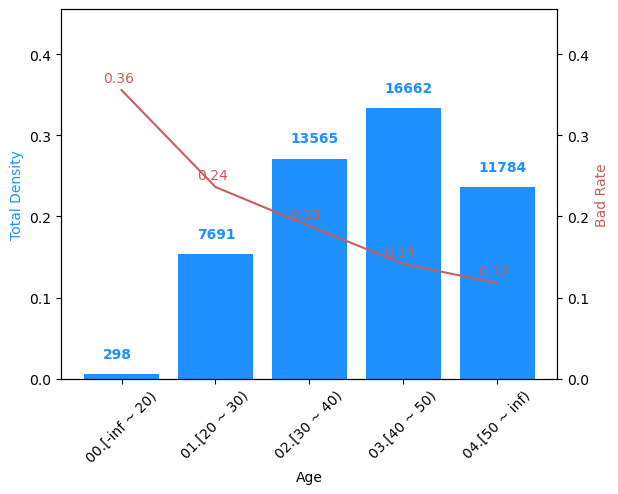

In [34]:
fig = plt.figure()

thr = max(df_ft['bad_rate'].max(), df_ft['total_pct'].max())

ax1 = fig.add_subplot(111)
ax1.bar(df_ft['bin'], df_ft['total_pct'], width=0.8, color='dodgerblue')
ax1.set_xticklabels(df_ft['bin'], rotation=45)
ax1.set_xlabel(feature_name)
ax1.set_ylabel('Total Density',color='dodgerblue')
ax1.axis(ymin=0,ymax=thr+0.1)

ax2 = ax1.twinx()
ax2.plot(df_ft['bin'], df_ft['bad_rate'], color='indianred')
ax2.set_ylabel('Bad Rate', color='indianred')
ax2.axis(ymin=0, ymax=thr+0.1)

for i, (n, p) in enumerate(zip(df_ft['total'], df_ft['total_pct'])):
    ax1.text(i-0.8/4, p+0.02, str(n), color='dodgerblue', fontweight='bold')

for i, (n, p) in enumerate(zip(df_ft['bad'], df_ft['bad_rate'])):
    ax1.text(i-0.8/4, p+0.01, str(round(p, 2)), color='indianred')

plt.show()